In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform 
from scipy.stats import loguniform 


path_name = 'your_path_name_here/mental_health.csv'
df=pd.read_csv(path_name)
print(df)

df = df.drop_duplicates()

#REDUCED SAMPLING
import random
size = list(df.index)
sample = random.sample(size,1000)
df = df.loc[sample]

#Split the matrix into predictors and response 
msg=df["text"]
msg=msg.str.replace('[^a-zA-Z0-9]+'," h", regex = True) 
y=df['label'].values
y 


#Stemming and Tokenising
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

#Vectorising
tf=TfidfVectorizer() 
data_vec=tf.fit_transform(msg)

#Train, Validation, and Test Split ###RANDOMSTATE=1###
from sklearn.model_selection import train_test_split
#test_size=0.3 implies 70% will be used to training and 30% for testing. 
#random_state sets seed for random number generator, ensuring reducibility
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

                                                    text  label
0      dear american teens question dutch person hear...      0
1      nothing look forward lifei dont many reasons k...      1
2      music recommendations im looking expand playli...      0
3      im done trying feel betterthe reason im still ...      1
4      worried  year old girl subject domestic physic...      1
...                                                  ...    ...
27972  posting everyday people stop caring  religion ...      0
27973  okay definetly need hear guys opinion ive pret...      0
27974  cant get dog think ill kill myselfthe last thi...      1
27975  whats point princess bridei really think like ...      1
27976  got nudes person might might know snapchat do ...      0

[27977 rows x 2 columns]


dict_items([('Linear SVM', SVC(kernel='linear', probability=True)), ('Polynomial SVM (degree 3)', SVC(kernel='poly', probability=True)), ('RBF SVM', SVC(probability=True))])


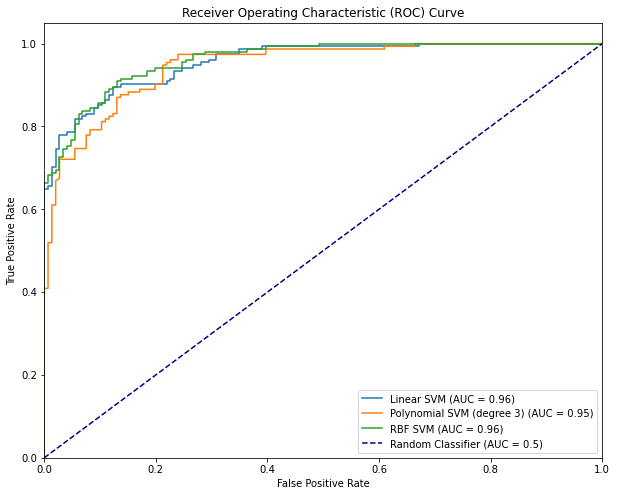

In [17]:
from sklearn.metrics import roc_curve, auc
classifiers = {
    'Linear SVM': SVC(kernel='linear', probability=True),
    'Polynomial SVM (degree 3)': SVC(kernel='poly', degree=3, probability=True),
    'RBF SVM': SVC(kernel='rbf', probability=True)
}

print(classifiers.items())
# Train each classifier and plot ROC curves
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_score = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = f'Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("ROC-curve.pdf", bbox_inches="tight")
plt.show()